In [1]:
import os
import math
import json
import random

import numpy as np
import pandas as pd
import networkx as nx
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from matplotlib.colors import LogNorm
from matplotlib.scale import ScaleBase, register_scale
from matplotlib.ticker import FuncFormatter, FixedLocator
import matplotlib.gridspec as gridspec

import seaborn as sns


/Users/bijinjoseph/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bijinjoseph/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bijinjoseph/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:1185: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


Slope: 2.0599108318834474
Intercept: 11.449839275703807
R-squared: 0.8639769356456618
P-value: 9.918004912055029e-05
Standard error: 0.28897390757120645


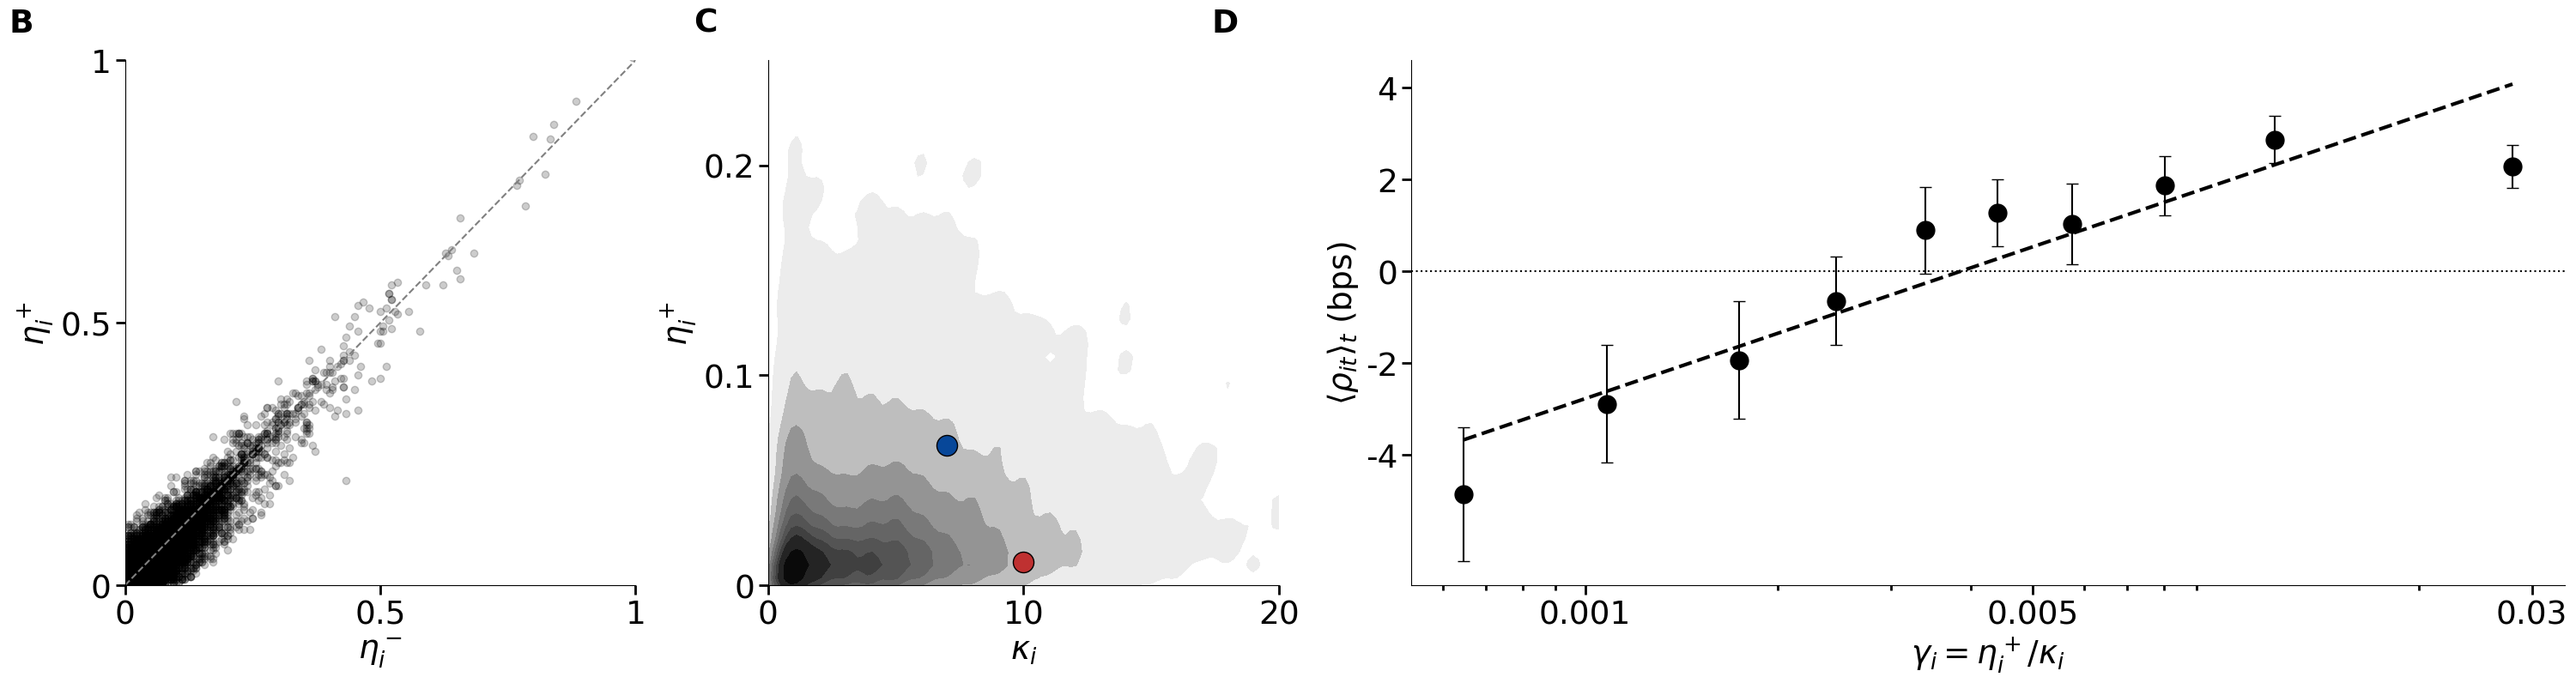

In [3]:
data1 = pd.read_csv('../data/fig2_b.csv', index_col=0)
data2 = pd.read_csv('../data/fig2_c.csv')
df = pd.read_csv('../data/fig2_d.csv')

df = df.dropna().copy()
df = df[np.isfinite(df['Gamma']) & np.isfinite(df['Performance'])]

num_bins = 10  
df['GammaBin'] = pd.qcut(df['Gamma'], q=num_bins, duplicates='drop', labels=False)


binned_stats = df.groupby('GammaBin')['Performance'].agg(['mean', 'std', 'count'])
binned_stats['Gamma'] = df.groupby('GammaBin')['Gamma'].mean()  


binned_stats = binned_stats[binned_stats['count'] > 0]


binned_stats['sem'] = binned_stats['std'] / np.sqrt(binned_stats['count'])



fig = plt.figure(figsize=(30, 8))  
gs = gridspec.GridSpec(1, 4, figure=fig)


ax1 = fig.add_subplot(gs[0, 1])
sns.kdeplot(data=data2, x="kappa_values", y="etaplus_values", cmap="Greys", fill=True, norm=LogNorm(), bw_adjust=0.55)
ax1.set_ylabel(r'$\eta_i^+$', fontsize=27)
ax1.set_xlabel(r'$\kappa_i$', fontsize=27)
ax1.tick_params(axis='both', which='major', labelsize=27)  
ax1.set_yticks([0, 0.1, 0.2])
ax1.set_yticklabels(['0', '0.1', '0.2'])
ax1.set_xticks([0, 10, 20])
ax1.set_ylim(0, 0.25)
ax1.set_xlim(0, 20)
ax1.tick_params(axis='both', which='major', labelsize=27, length=8, width=2)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.scatter(10, 2/180, color='#BF3131', s=300, edgecolor='black', zorder=3)
ax1.scatter(7, 12/180, color='#074799', s=300, edgecolor='black', zorder=3)
ax1.text(-0.1, 1.1, 'C', transform=ax1.transAxes, fontsize=27, fontweight='bold', va='top', ha='right')  # Label A

etaplus_values = np.array(data1['etaplus_values'])
etaminus_values = np.array(data1['etaminus_values'])

ax2 = fig.add_subplot(gs[0, 0])
ax2.plot(etaplus_values/180, etaminus_values/180, 'o', color='black', alpha=0.2)
ax2.set_ylabel(r'$\eta_i^+$', fontsize=27)
ax2.set_xlabel(r'$\eta_i^-$', fontsize=27)
ax2.tick_params(axis='both', which='major', labelsize=27)  
ax2.set_ylim(-0.0, 100/180)
ax2.set_xlim(0, 100/180)
ax2.set_yticks([0, 0.5, 1])
ax2.set_yticklabels(['0', '0.5', '1'])
ax2.set_xticks([ 0, 0.5, 1])
ax2.set_xticklabels(['0', '0.5', '1'])
ax2.plot([0, 250/180], [0, 250/180], color='grey', linestyle='--')
ax2.text(-0.18, 1.1, 'B', transform=ax2.transAxes, fontsize=27, fontweight='bold', va='top', ha='right')  # Label B
ax2.tick_params(axis='both', which='major', labelsize=27, length=8, width=2)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
plt.tight_layout() 
ax3 = fig.add_subplot(gs[0, 2:4]) 


ax3.errorbar(binned_stats['Gamma'], 100 * binned_stats['mean'], yerr=100 * binned_stats['sem'],
             fmt='o', color='black', label='Binned mean and std', markersize=15, capsize=5)


if len(binned_stats) > 1:
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(binned_stats['Gamma']), 100 * binned_stats['mean'])
    predicted = (intercept + slope * np.log(binned_stats['Gamma']))
    ax3.plot(binned_stats['Gamma'], predicted, color='black', linewidth=3, linestyle='--')
    
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print(f"R-squared: {r_value**2}")
    print(f"P-value: {p_value}")
    print(f"Standard error: {std_err}")
else:
    print("Not enough data points for regression.")


ax3.axhline(y=0, color='black', linestyle='dotted', linewidth=1.5)
ax3.set_xscale('log')
ax3.set_xlabel(r'$\gamma_i = \eta_i^+/\kappa_i$', fontsize=27)
ax3.set_ylabel(r'$\langle\rho_{it}\rangle_{t}$ (bps)', fontsize=27)
ax3.tick_params(axis='both', which='major', labelsize=27, length=8, width=2)
ax3.tick_params(axis='both', which='minor', labelsize=20, length=4, width=2)
ax3.set_yticks([-4, -2, 0, 2, 4])
ax3.set_yticklabels(['-4', '-2', '0', '2', '4'], fontsize=27)
ax3.set_xticks([0.001, 0.005, 0.03])
ax3.set_xticklabels([0.001, 0.005, 0.03], fontsize=27)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.text(-0.15, 1.1, 'D', transform=ax3.transAxes, fontsize=27, fontweight='bold', va='top', ha='right')
plt.savefig('../images/figure_2.pdf', format='pdf')